<a href="https://colab.research.google.com/github/Anandpandit-001/Forest_fire_Prediction/blob/main/Forest_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from scipy import stats
from sklearn import svm

import os

In [ ]:
path = '/forestfires.csv'

In [ ]:
dfmain = pd.read_csv(path , header =0)

In [ ]:
print (dfmain.shape)
dfmain.head(2)

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


In [ ]:
dfmain['fire_scale'] = dfmain['area'].apply(lambda x: 'no_fire' if (x==0)else
                                                      'small_fire' if ((x>0)&(x<2))else
                                                      'large_fire' )

In [ ]:
print(dfmain.shape)
dfmain.head(2)

(517, 14)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,fire_scale
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,no_fire
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,no_fire


<BarContainer object of 12 artists>

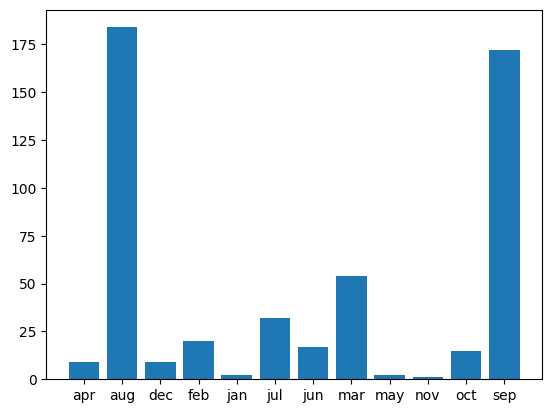

In [ ]:
t = dfmain.groupby(['month'])['month'].count()
plt.bar(t.index , t)

<BarContainer object of 7 artists>

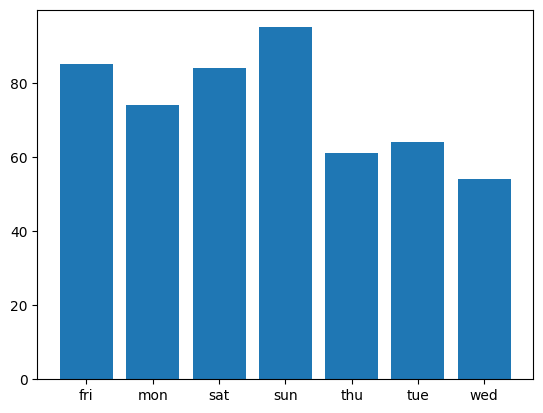

In [ ]:
t = dfmain.groupby(['day'])['day'].count()
plt.bar(t.index , t)

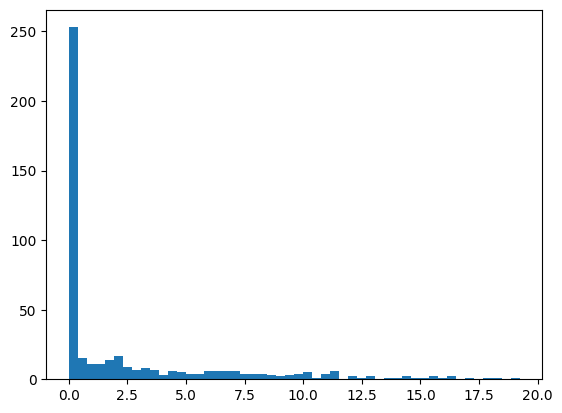

In [ ]:
plt.hist(dfmain[dfmain['area']<20].area , bins=50)
plt.show()

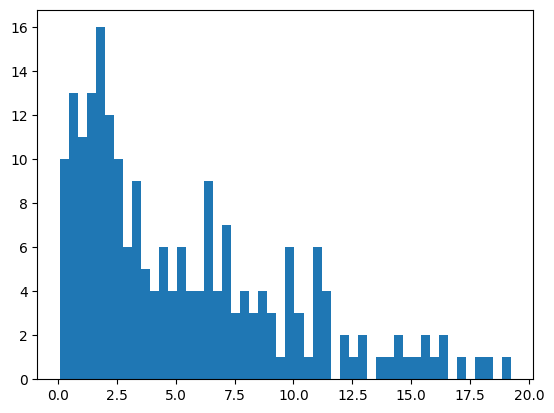

In [ ]:
plt.hist(dfmain[(dfmain['area']  > 0 )& (dfmain['area']<20)].area, bins=50)
plt.show()

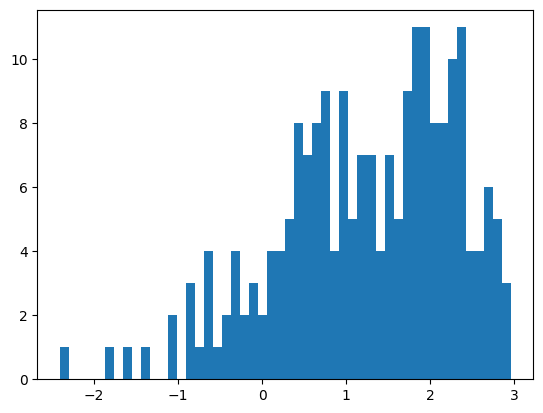

In [ ]:
plt.hist(np.log(dfmain[(dfmain['area']  > 0 )& (dfmain['area']<20)].area), bins=50)
plt.show()

# **Regression Model**

In [ ]:
d = dfmain.copy()


In [ ]:
X = d.drop(['area','fire_scale'] , axis=1)

In [ ]:
Y = d['area']

In [ ]:
X = pd.get_dummies(X ,['month' ,'day'])
X.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,True,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
x_cols_for_scaling =['X',	'Y'	,'FFMC'	,'DMC'	,'DC','ISI',	'temp'	,'RH'	,'wind',	'rain']

**Spliting dataset into Test and Training set**

In [ ]:
x_train ,x_test ,y_train ,y_test = train_test_split(X ,np.log(Y+1) ,shuffle=True)

In [ ]:
print(x_train.shape ,x_test.shape)

(387, 29) (130, 29)


In [ ]:
x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)
x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

StandardScaler

In [ ]:
scl=preprocessing.StandardScaler()
scl.fit(x_train_orig)
x_train_orig = scl.transform(x_train_orig)
x_test_orig =scl.transform(x_test_orig)

In [ ]:
# Combining Scaled Columns and Catogirical Columns
# Scalar output numpy array
x_train = np.concatenate((x_train_orig, np.array(x_train_cat)), axis=1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis=1)

In [ ]:
print(x_train.shape , x_test.shape)

(387, 29) (130, 29)


Model : Linear Regression

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

# Predict
y_pred = reg.predict(x_test)

In [ ]:
# Score
mse = metrics.mean_squared_error(y_test , y_pred)
print('mse:' ,np.round(mse ,4))
mae = metrics.mean_squared_error(y_test , y_pred)
print('mse:' ,np.round(mae ,4))
r2 = metrics.r2_score(y_test , y_pred)
print('r2:' ,np.round(r2 ,4))


mse: 2.6306
mse: 2.6306
r2: -0.0666


Text(0, 0.5, 'y_pred')

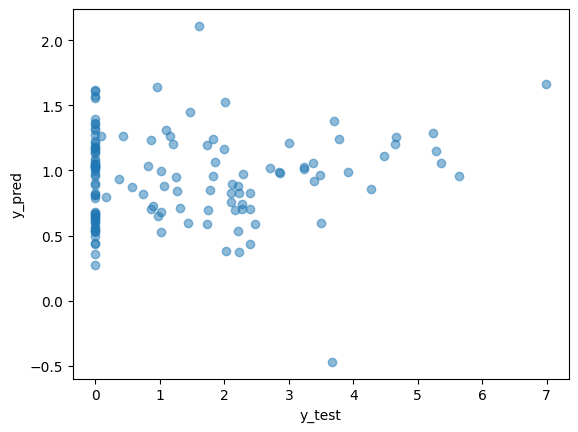

In [ ]:
# plot
plt.scatter(y_test ,y_pred ,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
reg = svm.SVR(C=1, kernel='rbf', gamma='auto', max_iter=50000, cache_size=1000)
reg.fit(x_train, np.ravel(y_train))

y_pred = reg.predict(x_test)


mse:  3.1732
mae:  1.2535
r2:  -0.2866


Text(0, 0.5, 'y_pred')

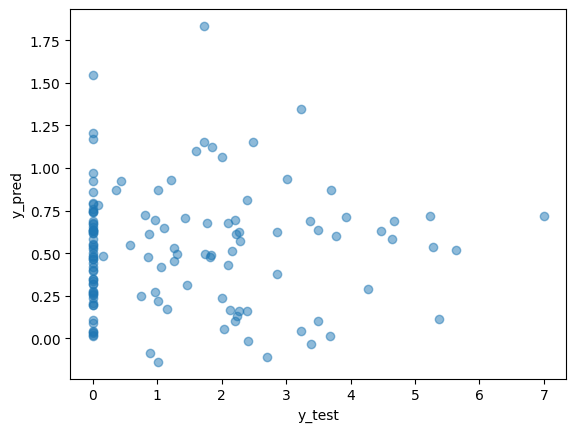

In [ ]:
# Score
mse = metrics.mean_squared_error(y_test, y_pred)
print('mse: ', np.round(mse, 4))

mae = metrics.mean_absolute_error(y_test, y_pred)
print('mae: ', np.round(mae, 4))

r2 = metrics.r2_score(y_test, y_pred)
print('r2: ', np.round(r2, 4))


# Plot
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('y_pred')

**Model: Classification**

In [ ]:
dfc = dfmain.copy()

In [ ]:
dfc.fire_scale.value_counts()

,count
fire_scale,
no_fire,247
large_fire,208
small_fire,62


In [ ]:
#Before Upcsaling
print(dfc.shape)
#After Upscaling
for m in dfc['month'].unique():
  if((m!='aug') & (m!='sep')):
    temp =dfc[dfc['month']==m].sample(300, replace=True)
    dfc = pd.concat([dfc , temp],axis = 0)

print(dfc.shape)

(517, 14)
(3517, 14)


In [ ]:
# Encoding Columns
Xc = dfc.drop(['area', 'fire_scale'], axis=1)
yc = dfc['fire_scale']

Xc = pd.get_dummies(Xc, ['month', 'day'])
Xc.head(2)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,False,False,False,True,False,False,False,False,False,False
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
x_cols_for_scaling = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xc, yc,
                                                    shuffle=True, stratify=yc)
print(x_train.shape, x_test.shape)

(2637, 29) (880, 29)


Feature_Scaling StandardScaler

In [ ]:
x_train_orig = x_train.loc[:, x_cols_for_scaling]
x_train_cat = x_train.drop(x_cols_for_scaling, axis=1)

x_test_orig = x_test.loc[:, x_train_orig.columns]
x_test_cat = x_test.loc[:, x_train_cat.columns]

In [ ]:
scl=preprocessing.StandardScaler()
scl.fit(x_train_orig)

x_train_orig = scl.transform(x_train_orig)
x_test_orig = scl.transform(x_test_orig)

# Combine
x_train = np.concatenate([x_train_orig, np.array(x_train_cat)], axis=1)
x_test = np.concatenate([x_test_orig, np.array(x_test_cat)], axis=1)

print(x_train.shape, x_test.shape)

(2637, 29) (880, 29)


Model: Logestic Regression

In [ ]:
clf = linear_model.LogisticRegression(max_iter=50000, penalty='elasticnet', solver='saga', l1_ratio=0.75)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acu = metrics.accuracy_score(y_test, y_pred)
print("acu: ", np.round(acu, 4))

cm = metrics.confusion_matrix(y_test, y_pred)
cm

acu:  0.7705


array([[257,  86,   1],
       [ 60, 421,   7],
       [ 20,  28,   0]])

Model: SVC

In [ ]:
clf = svm.SVC(C=1, kernel='rbf', gamma='auto', max_iter=50000, cache_size=1000)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

acu = metrics.accuracy_score(y_test, y_pred)
print("acu: ", np.round(acu, 4))

cm = metrics.confusion_matrix(y_test, y_pred)
cm

acu:  0.8489


array([[290,  54,   0],
       [ 42, 446,   0],
       [ 20,  17,  11]])